1. Load your dataset. 

In [67]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Meriem\Desktop\AI\CC GENERAL.csv', sep=",")
print(df.head().to_string(),'\n \n') 
df.info()

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE
0  C10001    40.900749           0.818182      95.40              0.00                    95.4      0.000000             0.166667                    0.000000                          0.083333                0.000000                 0              2        1000.0   201.802084        139.509787          0.000000      12
1  C10002  3202.467416           0.909091       0.00              0.00                     0.0   6442.945483             0.000000                    0.000000                          0.000000                0.250000                 4              0        7000.0  4103.032597       1072.340217          0.222222      12
2  C10003  2495.148862           1.00000

In [2]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [3]:
print(df.dtypes)

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object


data preprocessing

In [68]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)

In [3]:
print(df['CREDIT_LIMIT'].isnull().sum())

0


In [69]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)

In [7]:
print(df['MINIMUM_PAYMENTS'].isnull().sum())

0


2. Use hierarchical clustering to identify the inherent groupings within your data.

In [70]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering 
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans

dropping the cust_ID column 

In [71]:
df.drop('CUST_ID', axis=1, inplace=True)

In [72]:
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(df)
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,0
1,0
2,0
3,0
4,0
...,...
8945,0
8946,0
8947,0
8948,0


3. Plot the clusters. 

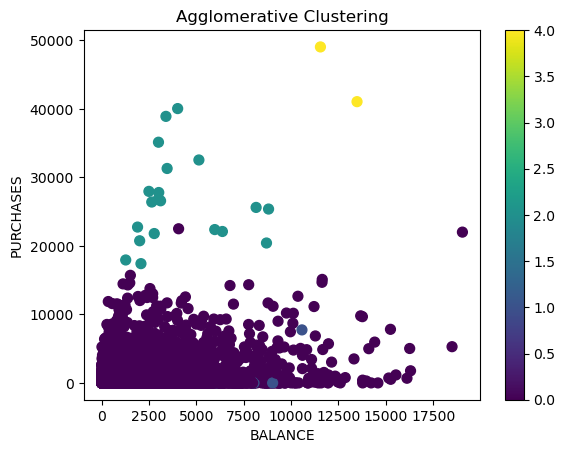

In [73]:
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (df ['BALANCE'] , df ["PURCHASES"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clustering")
ax.set_xlabel("BALANCE")
ax.set_ylabel("PURCHASES")
plt.colorbar(scatter)

4. Plot the dendrogram. Use K-means clustering.

In [74]:
kmeans=KMeans(n_clusters=5, random_state=0)  
kmeans.fit(df)
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,2
1,3
2,0
3,0
4,2
...,...
8945,2
8946,2
8947,2
8948,2


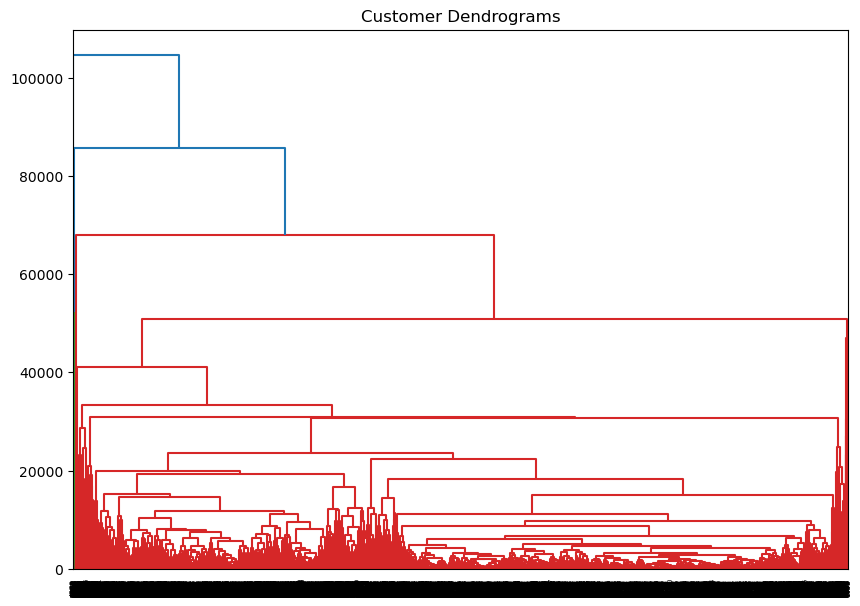

In [75]:
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(df, method="complete"))

5. Try different K values and select the best one. 

The best k value according to the elbow method is 3. K=3

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

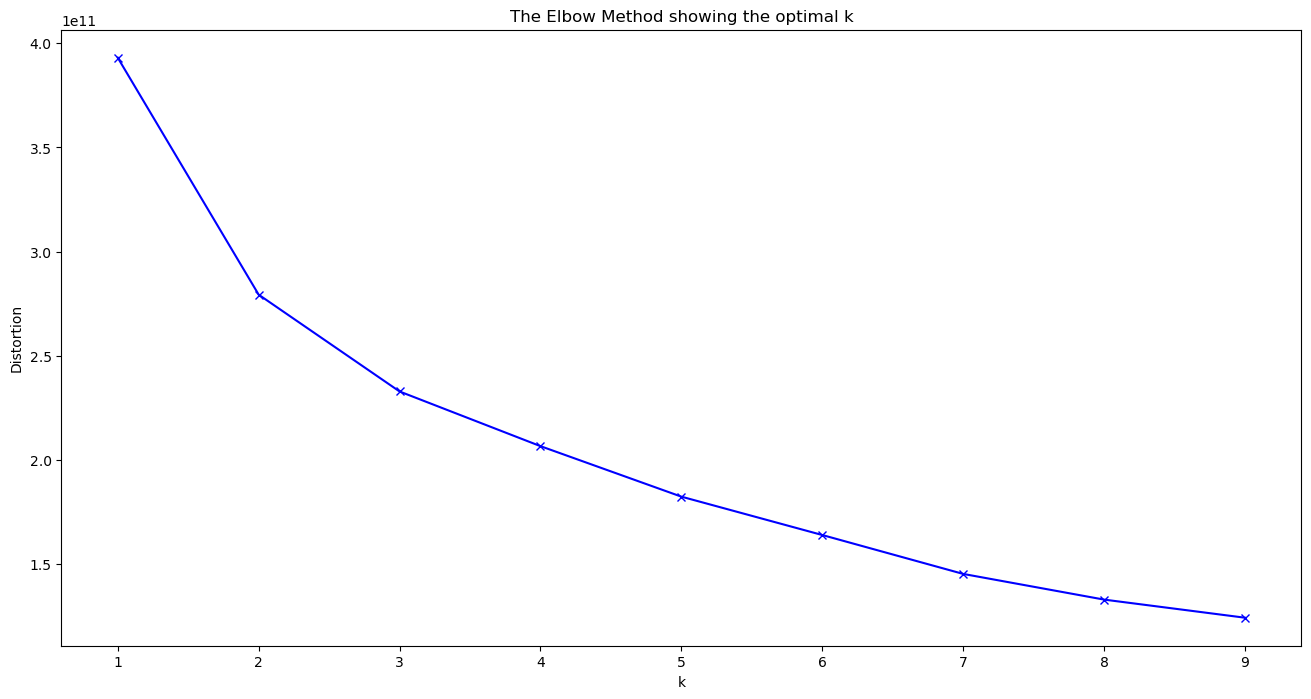

In [76]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)
    plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

6. Plot the clusters. 

In [78]:
kmeans=KMeans(n_clusters=3, random_state=0) 
kmeans.fit(df)
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,1
1,0
2,0
3,0
4,1
...,...
8945,1
8946,1
8947,1
8948,1


In [79]:
kmeans.predict(df)
print(kmeans.cluster_centers_)

[[3.38437741e+03 9.40633662e-01 1.58295903e+03 9.88230993e+02
  5.95038513e+02 2.11246771e+03 5.40499429e-01 3.16939855e-01
  3.85650235e-01 2.10080036e-01 5.72419775e+00 2.21322637e+01
  8.99427777e+03 2.89211053e+03 1.55916469e+03 1.35204183e-01
  1.17385082e+01]
 [8.54809529e+02 8.54161652e-01 6.02666564e+02 3.12080877e+02
  2.90884840e+02 4.94282667e+02 4.67368228e-01 1.54005733e-01
  3.52144432e-01 1.06792419e-01 2.25376113e+00 1.06555112e+01
  2.74239608e+03 9.95880355e+02 5.85241721e+02 1.56660059e-01
  1.14326067e+01]
 [4.84189326e+03 9.11252077e-01 1.07893056e+04 7.61968438e+03
  3.16979046e+03 5.15222013e+03 7.52377608e-01 5.99535492e-01
  6.04122562e-01 2.26540108e-01 9.20000000e+00 8.62000000e+01
  1.24657692e+04 1.81174305e+04 2.51500153e+03 3.34474108e-01
  1.18384615e+01]]


ValueError: x and y must be the same size

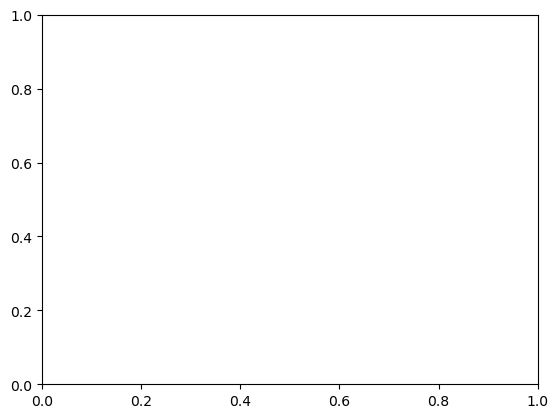

In [80]:
plt.scatter(df["BALANCE"][df.BALANCE == 0],          
            df["PURCHASES"][df.PURCHASES == 0],s=80,c='magenta',label='Careful')
plt.scatter(df["BALANCE"][df.BALANCE == 1],
           df["PURCHASES"][df.PURCHASES == 1],s=80,c='yellow',label='Standard')
plt.scatter(df["BALANCE"][df.BALANCE == 2],
           df["PURCHASES"][df.PURCHASES == 2],s=80,c='green',label='Target')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.legend()
plt.show()

In [83]:
kmeans = KMeans(n_clusters = 3,                 # Set amount of clusters
                init = 'k-means++',             # Initialization method for kmeans
                max_iter = 300,                 # Maximum number of iterations
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 0)               # Choose random state for reproducibility

pred_y = kmeans.fit_predict(df)


# Plot the data
plt.scatter(df[:,0], 
            df[:,1])

# Plot the clusters 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=200,                             # Set centroid size
            c='red')                           # Set centroid color
plt.show()


InvalidIndexError: (slice(None, None, None), 0)

7. Compare the two results. 